<a href="https://colab.research.google.com/github/vi1801/Text-to-Image-Generation/blob/main/old_version_of_Text_to_Image_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Aug  4 18:58:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Text-to-Image generation model
###Dataset: Flickr8K from Kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Checking the RAM available
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


##Dataset - Flickr8k

In [ ]:
file_path = '/content/drive/MyDrive/Dataset/captions.txt'

# Read the file and split the content by lines
with open(file_path, 'r') as f:
    captions = f.read().splitlines()

# Get the number of captions
num_captions = len(captions)

# Print the result
print('Number of Captions:', num_captions)

Number of Captions: 40455


Total captions: 40455
Total images: 8101


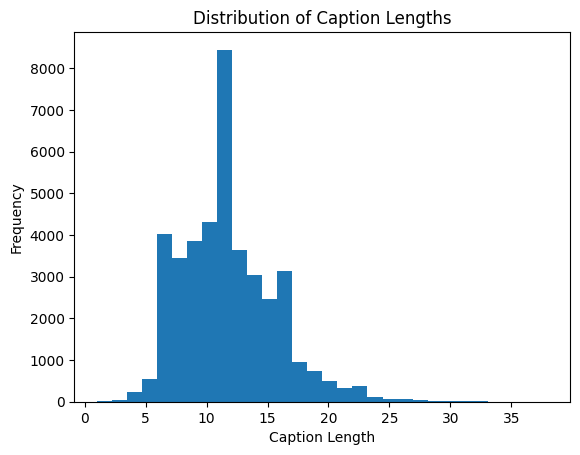

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/Dataset'

# Load the captions from the text file
captions_file = os.path.join(data_dir, 'captions.txt')
captions = open(captions_file).read().split('\n')

# Remove empty captions
captions = [caption for caption in captions if caption]

# Get the number of captions and images in the dataset
num_captions = len(captions)
num_images = len(os.listdir(os.path.join(data_dir, 'Images')))

print(f"Total captions: {num_captions}")
print(f"Total images: {num_images}")

# Plot a histogram of caption lengths
caption_lengths = [len(caption.split()) for caption in captions]
plt.hist(caption_lengths, bins=30)
plt.xlabel("Caption Length")
plt.ylabel("Frequency")
plt.title("Distribution of Caption Lengths")
plt.show()

       image_height  image_width  image_channels  min_pixel_value  \
count   8101.000000  8101.000000          8101.0      8101.000000   
mean     397.196642   457.903592             3.0         0.124429   
std       75.663282    68.645399             0.0         1.623309   
min      127.000000   164.000000             3.0         0.000000   
25%      333.000000   400.000000             3.0         0.000000   
50%      375.000000   500.000000             3.0         0.000000   
75%      500.000000   500.000000             3.0         0.000000   
max      500.000000   500.000000             3.0        50.000000   

       max_pixel_value  
count      8101.000000  
mean        254.577583  
std           3.899770  
min         144.000000  
25%         255.000000  
50%         255.000000  
75%         255.000000  
max         255.000000  


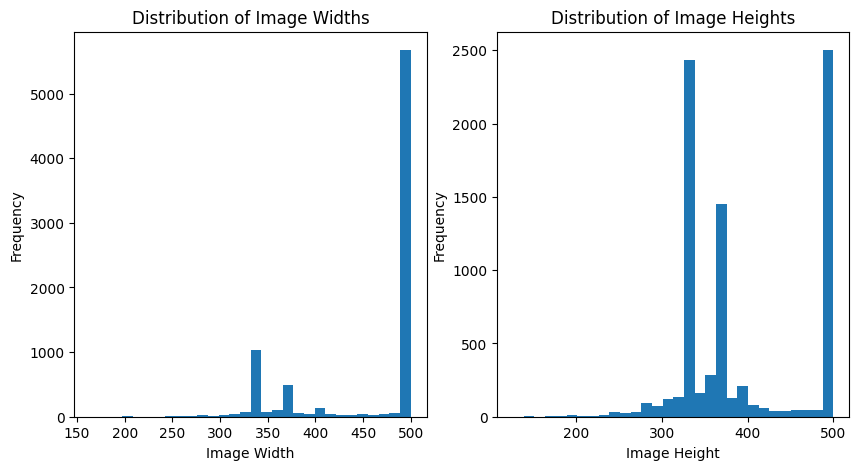

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

images_folder = os.path.join(data_dir, 'Images')

image_properties = []
for image_filename in os.listdir(images_folder):
    image_path = os.path.join(images_folder, image_filename)
    image = cv2.imread(image_path)
    image_properties.append({
        'image_filename': image_filename,
        'image_height': image.shape[0],
        'image_width': image.shape[1],
        'image_channels': image.shape[2],
        'min_pixel_value': image.min(),
        'max_pixel_value': image.max(),
    })

# convert the image properties to a DataFrame for analysis
image_properties_df = pd.DataFrame(image_properties)

print(image_properties_df.describe())

# plot histogram of image width and height
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(image_properties_df['image_width'], bins=30)
plt.xlabel("Image Width")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")

plt.subplot(1, 2, 2)
plt.hist(image_properties_df['image_height'], bins=30)
plt.xlabel("Image Height")
plt.ylabel("Frequency")
plt.title("Distribution of Image Heights")

plt.show()

In [ ]:
#Mapping
image_caption_mapping = {}

captions_file = '/content/drive/MyDrive/Dataset/captions.txt'

with open(captions_file, 'r') as f:
    for line in f:
        image_filename, caption = line.strip().split(',', 1)
        image_filename = image_filename.strip()
        caption = caption.strip()

        if image_filename not in image_caption_mapping:
            image_caption_mapping[image_filename] = caption

# Save the mapping to a file
mapping_file = '/content/drive/MyDrive/Dataset/image_caption_mapping.txt'
with open(mapping_file, 'w') as f:
    for image_filename, caption in image_caption_mapping.items():
        f.write(f"{image_filename},{caption}\n")

for image_filename, caption in image_caption_mapping.items():
    print(f"Image: {image_filename}")
    print(f"Caption: {caption}")

print("length of image caption mapping", len(image_caption_mapping))

Streaming output truncated to the last 5000 lines.
Caption: A man climbs up a rock while others wait for their turns .
Image: 3429142249_d09a32e291.jpg
Caption: A climber hanging from an ice pick in the side of a frozen waterfall .
Image: 3429194423_98e911a101.jpg
Caption: A man doing a trick on skis .
Image: 3429351222_17ae744daf.jpg
Caption: A man and a woman walk at a flea market .
Image: 3429351964_531de1bf16.jpg
Caption: An Asian woman is at a market stall that is selling bananas .
Image: 3429391520_930b153f94.jpg
Caption: A bicyclist catches some air
Image: 3429465163_fb8ac7ce7f.jpg
Caption: A child in a red and grey coat in front of a wooden shed .
Image: 3429581486_4556471d1a.jpg
Caption: A brown and black dog runs over the green grass .
Image: 3429641260_2f035c1813.jpg
Caption: A boy jumps near a brick structure .
Image: 3429956016_3c7e3096c2.jpg
Caption: A man climbing the icicles on a rock face .
Image: 3430100177_5864bf1e73.jpg
Caption: A crowd of people sit an walk across 

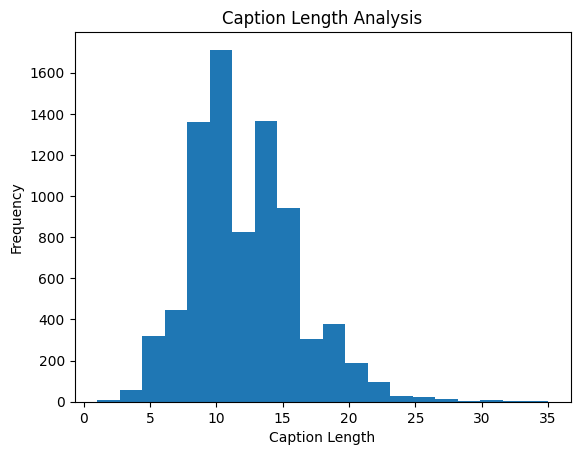

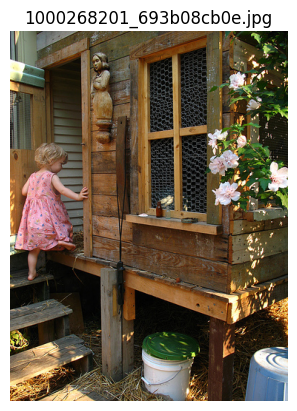

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load a sample of images
sample_images = list(image_caption_mapping.keys())[:1]

# Calculate caption lengths and store them in a list
caption_lengths = [len(caption.split()) for caption in image_caption_mapping.values()]

plt.hist(caption_lengths, bins=20)
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.title('Caption Length Analysis')
plt.show()

# Visualize the sample images
for image_filename in sample_images:
    image_path = os.path.join('/content/drive/MyDrive/Dataset/Images', image_filename)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(image_filename)
    plt.axis('off')
    plt.show()

In [ ]:
!pip install torchvision
!pip install torch

In [ ]:
!pip install opencv-python
!pip install nltk
!pip install torch torchvision --upgrade

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
torch.cuda.memory_cached()
torch.cuda.memory_allocated()

/usr/local/lib/python3.10/dist-packages/torch/cuda/memory.py:416: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


8519680

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Preprocessing the data


In [ ]:
import os
import numpy as np
import re
from PIL import Image
from torchvision import transforms
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set the paths for images and the mapped caption file
images_dir = '/content/drive/MyDrive/Dataset/Images/'
mapped_caption_file = '/content/drive/MyDrive/Dataset/image_caption_mapping.txt'

# Define the preprocessing transformations for images
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to a specific size
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image
])

# Define the text preprocessing function
def preprocess_text(text):
    # Clean the text by removing unwanted characters, punctuation, or special symbols
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # Replace non-alphanumeric characters with spaces
    text = text.lower()  # Convert the text to lowercase
    text = text.strip()  # Remove leading/trailing whitespaces

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a sentence
    preprocessed_text = " ".join(words)

    return preprocessed_text

# Create lists to store preprocessed images and captions
preprocessed_images = []
preprocessed_captions = []

# Load and preprocess the images and captions
with open(mapped_caption_file, 'r') as f:
    for line in f:
        image_filename, caption = line.strip().split(',', 1)
        image_filename = image_filename.strip()
        caption = caption.strip()

        # Preprocess the image
        image_path = os.path.join(images_dir, image_filename)
        image = Image.open(image_path)
        image = image_transforms(image)
        preprocessed_images.append(image)

        # Preprocess the caption
        preprocessed_caption = preprocess_text(caption)
        preprocessed_captions.append(preprocessed_caption)

# Pad the images to have the same height
max_image_height = max(image.shape[1] for image in preprocessed_images)
padded_images = [transforms.functional.pad(image, (0, 0, 0, max_image_height - image.shape[1])) for image in preprocessed_images]

# Convert the padded images to NumPy arrays
padded_images_np = np.stack(padded_images, axis=0).astype(np.float32)

# Convert the preprocessed captions to a NumPy array
preprocessed_captions_np = np.array(preprocessed_captions)

# Save the preprocessed images and captions to files
np.save('/content/drive/MyDrive/Dataset/preprocessed_images.npy', padded_images_np)
with open('/content/drive/MyDrive/Dataset/preprocessed_captions.txt', 'w') as f:
    for caption in preprocessed_captions_np:
        f.write(caption + '\n')
print('Number of Preprocessed Captions:', len(preprocessed_captions_np))

In [ ]:
import numpy as np

# Load the preprocessed images
preprocessed_images = np.load('/content/drive/MyDrive/Dataset/preprocessed_images.npy', allow_pickle=True)

# Check the shape and content of the preprocessed images
print('Preprocessed Images Shape:', preprocessed_images.shape)
print('First Preprocessed Image:')
print(preprocessed_images[1])
print(preprocessed_images[1].dtype)

# Load the preprocessed captions
with open('/content/drive/MyDrive/Dataset/preprocessed_captions.txt', 'r') as f:
    preprocessed_captions = f.readlines()

# Check the number of preprocessed captions and print some examples
print('Number of Preprocessed Captions:', len(preprocessed_captions))
print('First Preprocessed Caption:')
print(preprocessed_captions[1])

Preprocessed Images Shape: (8091, 3, 224, 224)
First Preprocessed Image:
[[[-0.4054286  -0.42255333 -0.30268008 ... -1.4500387  -1.5527872
   -1.5527872 ]
  [-0.26843056 -0.38830382 -0.30268008 ... -1.4157891  -1.4329139
   -1.5185376 ]
  [-0.31980482 -0.2855553  -0.2855553  ... -1.5356624  -1.5699118
   -1.5527872 ]
  ...
  [-0.13143253 -0.01155927 -0.30268008 ... -0.81642264 -0.6622999
   -0.6109256 ]
  [-0.33692956 -0.13143253 -0.11430778 ... -0.78217316 -0.5081771
   -0.7479236 ]
  [-0.55955136 -0.2170563  -0.11430778 ... -0.6280504  -0.59380084
   -0.6622999 ]]

 [[-0.26750696 -0.28501397 -0.17997196 ... -1.230392   -1.4404761
   -1.5280112 ]
  [-0.14495796 -0.26750696 -0.17997196 ... -1.1953781  -1.30042
   -1.457983  ]
  [-0.21498597 -0.16246496 -0.16246496 ... -1.352941   -1.4229691
   -1.4229691 ]
  ...
  [-0.07492995  0.06512605 -0.12745096 ... -0.617647   -0.42507
   -0.35504198]
  [-0.30252096 -0.09243695  0.01260505 ... -0.635154   -0.30252096
   -0.53011197]
  [-0.4775909

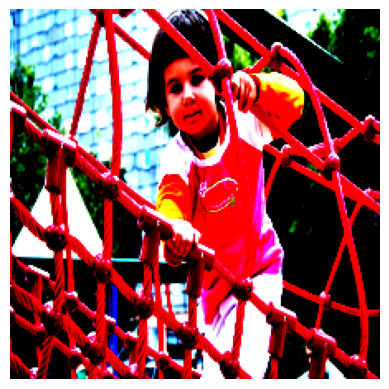

Caption: child playing rope net



In [ ]:
import matplotlib.pyplot as plt

# Select an index of the image you want to visualize
index = 5

# Retrieve the preprocessed image and caption
image = preprocessed_images[index]
caption = preprocessed_captions[index]

# Convert the tensor image to a NumPy array
image = np.transpose(image, (1, 2, 0))

# Display the image and caption
plt.imshow(image)
plt.axis('off')
plt.show()

print('Caption:', caption)

###Splitting the preprocessed text and images
training set: 80%, validation set= 10%, testing set = 10%

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load the preprocessed images and captions with allow_pickle=True
preprocessed_images = np.load('/content/drive/MyDrive/Dataset/preprocessed_images.npy', allow_pickle=True)
with open('/content/drive/MyDrive/Dataset/preprocessed_captions.txt', 'r') as f:
    preprocessed_captions = f.read().split('\n')

# Remove any empty captions
# preprocessed_captions = [caption for caption in preprocessed_captions if caption.strip()]

# Make sure the number of images and captions match
num_samples = min(len(preprocessed_images), len(preprocessed_captions))
preprocessed_images = preprocessed_images[:num_samples]
preprocessed_captions = preprocessed_captions[:num_samples]

# Shuffle the data to ensure randomness (using the same random indices for both images and captions)
indices = np.arange(num_samples)
np.random.shuffle(indices)

preprocessed_images = preprocessed_images[indices]
preprocessed_captions = np.array(preprocessed_captions)[indices]

# Split the data into train, validation, and test sets
train_images, val_test_images, train_captions, val_test_captions = train_test_split(preprocessed_images, preprocessed_captions, test_size=0.2, random_state=42)
val_images, test_images, val_captions, test_captions = train_test_split(val_test_images, val_test_captions, test_size=0.5, random_state=42)

# Save the split datasets
np.save('/content/drive/MyDrive/Dataset/train_images.npy', train_images)
with open('/content/drive/MyDrive/Dataset/train_captions.txt', 'w') as f:
    for caption in train_captions:
        f.write(caption + '\n')

np.save('/content/drive/MyDrive/Dataset/val_images.npy', val_images)
with open('/content/drive/MyDrive/Dataset/val_captions.txt', 'w') as f:
    for caption in val_captions:
        f.write(caption + '\n')

np.save('/content/drive/MyDrive/Dataset/test_images.npy', test_images)
with open('/content/drive/MyDrive/Dataset/test_captions.txt', 'w') as f:
    for caption in test_captions:
        f.write(caption + '\n')

In [ ]:
import numpy as np

# Load the train, validation, and test images
train_images = np.load('/content/drive/MyDrive/Dataset/train_images.npy', allow_pickle=True)
val_images = np.load('/content/drive/MyDrive/Dataset/val_images.npy', allow_pickle=True)
test_images = np.load('/content/drive/MyDrive/Dataset/test_images.npy', allow_pickle=True)

# Load the train, validation, and test captions
with open('/content/drive/MyDrive/Dataset/train_captions.txt', 'r') as f:
    train_captions = f.read().splitlines()  # This will remove empty lines
with open('/content/drive/MyDrive/Dataset/val_captions.txt', 'r') as f:
    val_captions = f.read().splitlines()
with open('/content/drive/MyDrive/Dataset/test_captions.txt', 'r') as f:
    test_captions = f.read().splitlines()

# Check the lengths of the sets
print('Train Set - Number of Images:', len(train_images), 'Number of Captions:', len(train_captions))
print('Validation Set - Number of Images:', len(val_images), 'Number of Captions:', len(val_captions))
print('Test Set - Number of Images:', len(test_images), 'Number of Captions:', len(test_captions))

print('train set shape: ', train_images.shape)
print('train set datatype', train_images.dtype)
print('val set shape: ', val_images.shape)
print('val set datatype', val_images.dtype)
print('test set shape: ', test_images.shape)
print('test set datatype', test_images.dtype)

Train Set - Number of Images: 6472 Number of Captions: 6472
Validation Set - Number of Images: 809 Number of Captions: 809
Test Set - Number of Images: 810 Number of Captions: 810
train set shape:  (6472, 3, 224, 224)
train set datatype float32
val set shape:  (809, 3, 224, 224)
val set datatype float32
test set shape:  (810, 3, 224, 224)
test set datatype float32


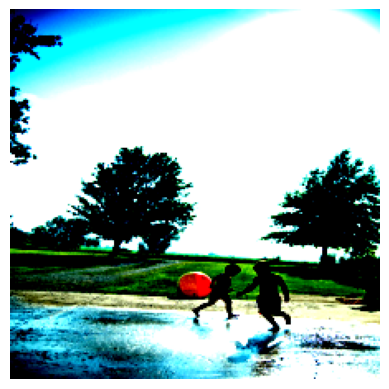

Caption: children playing water


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select an index of the image you want to visualize
index = 11

# Retrieve the split image and caption
image = train_images[index]
caption = train_captions[index]

# Rearrange the dimensions if needed
if image.shape[0] == 3:
    image = np.transpose(image, (1, 2, 0))

# Display the image and caption
plt.imshow(image)
plt.axis('off')
plt.show()

print('Caption:', caption)

###Building a model architecture

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.4 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertModel, BertTokenizer

bert_model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_text(text):
  # Tokenize input text
  input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])

  # Pass input through BERT model to get contextual embeddings
  with torch.no_grad():
      bert_output = bert_model(input_ids)[0]

  # Take the first token's embeddings as the representation for the whole text
  text_embedding = bert_output[:, 0, :]

  return text_embedding

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet50
from transformers import BertModel, BertTokenizer

def initialize_bert_model():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)
    return bert_model, tokenizer

def initialize_resnet_model():
    resnet_model = resnet50(pretrained=True)
    num_resnet_features = resnet_model.fc.in_features
    resnet_model.fc = nn.Linear(num_resnet_features, 768).to(device)
    return resnet_model

def get_resnet_features(resnet_model, x):
    features = resnet_model(x)
    return features

In [ ]:
CUDA_LAUNCH_BLOCKING=1

Using GPU: NVIDIA A100-SXM4-40GB


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

Epoch 1/30


100%|██████████| 405/405 [03:28<00:00,  1.94it/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Generator Loss: -0.0771 | Discriminator Loss: 1.3951


100%|██████████| 51/51 [00:13<00:00,  3.92it/s]


Val Generator Loss: 0.4748 | Val Discriminator Loss: 0.7251
Epoch 2/30


100%|██████████| 405/405 [03:24<00:00,  1.98it/s]


Generator Loss: -0.0864 | Discriminator Loss: 1.4031


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4749 | Val Discriminator Loss: 0.7251
Epoch 3/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0875 | Discriminator Loss: 1.4064


100%|██████████| 51/51 [00:12<00:00,  3.93it/s]


Val Generator Loss: 0.4740 | Val Discriminator Loss: 0.7258
Epoch 4/30


100%|██████████| 405/405 [03:24<00:00,  1.98it/s]


Generator Loss: -0.0897 | Discriminator Loss: 1.4087


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4748 | Val Discriminator Loss: 0.7252
Epoch 5/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0912 | Discriminator Loss: 1.4108


100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


Val Generator Loss: 0.4741 | Val Discriminator Loss: 0.7258
Epoch 6/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0921 | Discriminator Loss: 1.4121


100%|██████████| 51/51 [00:13<00:00,  3.89it/s]


Val Generator Loss: 0.4739 | Val Discriminator Loss: 0.7259
Epoch 7/30


100%|██████████| 405/405 [03:23<00:00,  1.99it/s]


Generator Loss: -0.0931 | Discriminator Loss: 1.4141


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4734 | Val Discriminator Loss: 0.7264
Epoch 8/30


100%|██████████| 405/405 [03:25<00:00,  1.97it/s]


Generator Loss: -0.0934 | Discriminator Loss: 1.4149


100%|██████████| 51/51 [00:13<00:00,  3.88it/s]


Val Generator Loss: 0.4735 | Val Discriminator Loss: 0.7262
Epoch 9/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0937 | Discriminator Loss: 1.4158


100%|██████████| 51/51 [00:13<00:00,  3.92it/s]


Val Generator Loss: 0.4741 | Val Discriminator Loss: 0.7258
Epoch 10/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0943 | Discriminator Loss: 1.4165


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4738 | Val Discriminator Loss: 0.7261
Epoch 11/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0961 | Discriminator Loss: 1.4200


100%|██████████| 51/51 [00:12<00:00,  3.92it/s]


Val Generator Loss: 0.4740 | Val Discriminator Loss: 0.7259
Epoch 12/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0972 | Discriminator Loss: 1.4212


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4744 | Val Discriminator Loss: 0.7256
Epoch 13/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0974 | Discriminator Loss: 1.4218


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4741 | Val Discriminator Loss: 0.7258
Epoch 14/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0973 | Discriminator Loss: 1.4218


100%|██████████| 51/51 [00:13<00:00,  3.92it/s]


Val Generator Loss: 0.4746 | Val Discriminator Loss: 0.7256
Epoch 15/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0973 | Discriminator Loss: 1.4224


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4742 | Val Discriminator Loss: 0.7258
Epoch 16/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0977 | Discriminator Loss: 1.4225


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4743 | Val Discriminator Loss: 0.7257
Epoch 17/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0979 | Discriminator Loss: 1.4225


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4745 | Val Discriminator Loss: 0.7256
Epoch 18/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0971 | Discriminator Loss: 1.4228


100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


Val Generator Loss: 0.4742 | Val Discriminator Loss: 0.7258
Epoch 19/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0975 | Discriminator Loss: 1.4231


100%|██████████| 51/51 [00:13<00:00,  3.89it/s]


Val Generator Loss: 0.4748 | Val Discriminator Loss: 0.7256
Epoch 20/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0978 | Discriminator Loss: 1.4232


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4744 | Val Discriminator Loss: 0.7257
Epoch 21/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0979 | Discriminator Loss: 1.4236


100%|██████████| 51/51 [00:13<00:00,  3.89it/s]


Val Generator Loss: 0.4743 | Val Discriminator Loss: 0.7257
Epoch 22/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0985 | Discriminator Loss: 1.4237


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4748 | Val Discriminator Loss: 0.7255
Epoch 23/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0985 | Discriminator Loss: 1.4241


100%|██████████| 51/51 [00:12<00:00,  3.92it/s]


Val Generator Loss: 0.4747 | Val Discriminator Loss: 0.7255
Epoch 24/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0981 | Discriminator Loss: 1.4242


100%|██████████| 51/51 [00:13<00:00,  3.86it/s]


Val Generator Loss: 0.4745 | Val Discriminator Loss: 0.7257
Epoch 25/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0979 | Discriminator Loss: 1.4241


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4747 | Val Discriminator Loss: 0.7255
Epoch 26/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0985 | Discriminator Loss: 1.4243


100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


Val Generator Loss: 0.4744 | Val Discriminator Loss: 0.7257
Epoch 27/30


100%|██████████| 405/405 [03:20<00:00,  2.02it/s]


Generator Loss: -0.0982 | Discriminator Loss: 1.4241


100%|██████████| 51/51 [00:13<00:00,  3.91it/s]


Val Generator Loss: 0.4744 | Val Discriminator Loss: 0.7256
Epoch 28/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0979 | Discriminator Loss: 1.4240


100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


Val Generator Loss: 0.4744 | Val Discriminator Loss: 0.7258
Epoch 29/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0986 | Discriminator Loss: 1.4242


100%|██████████| 51/51 [00:12<00:00,  3.93it/s]


Val Generator Loss: 0.4745 | Val Discriminator Loss: 0.7258
Epoch 30/30


100%|██████████| 405/405 [03:19<00:00,  2.03it/s]


Generator Loss: -0.0981 | Discriminator Loss: 1.4241


100%|██████████| 51/51 [00:13<00:00,  3.89it/s]


Val Generator Loss: 0.4745 | Val Discriminator Loss: 0.7256
Text Embedding Shape: torch.Size([1, 1, 768])
Noise Shape: torch.Size([9, 100])


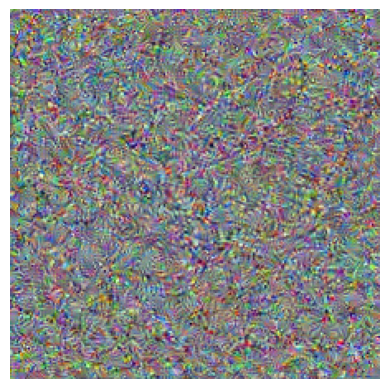

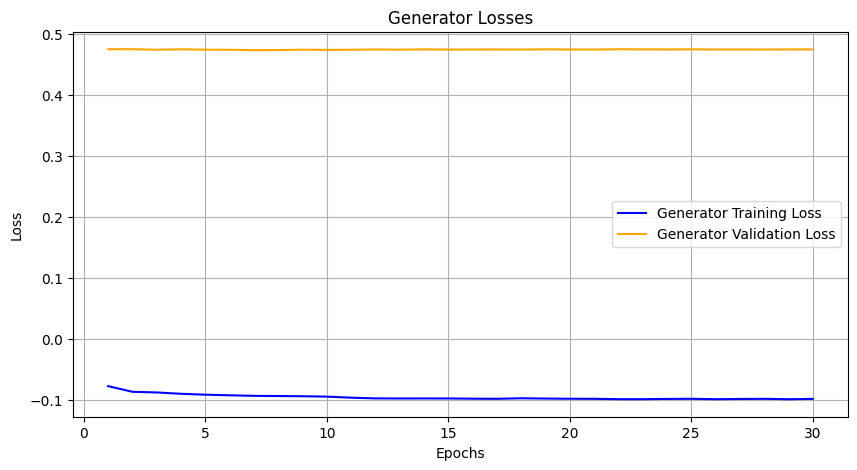

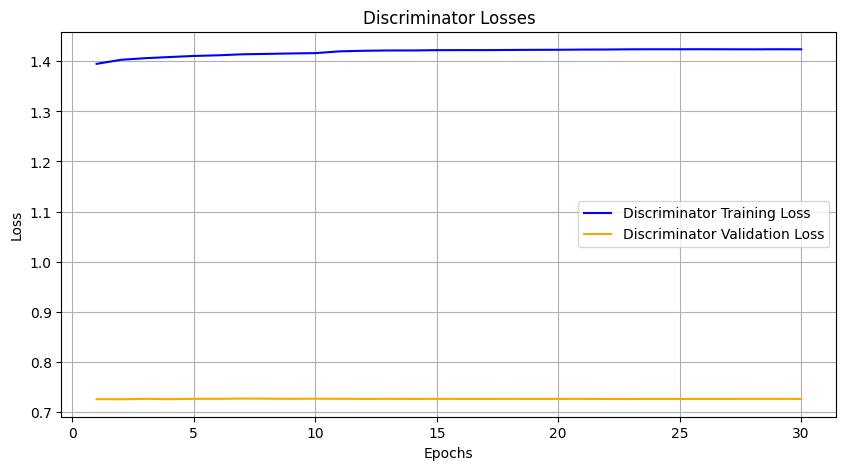

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision.models as models
from torchvision import transforms
from torchvision.models import resnet50
from transformers import BertModel, BertTokenizer
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU.")

# Initialize the BERT tokenizer and model
bert_model, tokenizer = initialize_bert_model()

# Load pre-trained ResNet50 model without the last fully connected layer
resnet_model = initialize_resnet_model()

# Define perceptual loss function using VGG network
class VGGPerceptualLoss(nn.Module):
    def __init__(self):
        super(VGGPerceptualLoss, self).__init__()
        vgg_features = models.vgg16(pretrained=True).features[:23]
        self.vgg = nn.Sequential(*list(vgg_features)).eval()
        for param in self.vgg.parameters():
            param.requires_grad = False
        self.criterion = nn.L1Loss()

    def forward(self, y_true, y_pred):
        true_features = self.vgg(y_true)
        pred_features = self.vgg(y_pred)
        loss = 0.0
        for t, p in zip(true_features, pred_features):
            loss += self.criterion(t, p)
        return loss

# Load preprocessed data
train_images = np.load('/content/drive/MyDrive/Dataset/train_images.npy', allow_pickle=True).astype(np.float32)
train_captions = open('/content/drive/MyDrive/Dataset/train_captions.txt').read().split('\n')
val_images = np.load('/content/drive/MyDrive/Dataset/val_images.npy', allow_pickle=True).astype(np.float32)
val_captions = open('/content/drive/MyDrive/Dataset/val_captions.txt').read().split('\n')
test_images = np.load('/content/drive/MyDrive/Dataset/test_images.npy', allow_pickle=True).astype(np.float32)
test_captions = open('/content/drive/MyDrive/Dataset/test_captions.txt').read().split('\n')

# Remove empty captions
train_captions = [caption for caption in train_captions if caption]
val_captions = [caption for caption in val_captions if caption]
test_captions = [caption for caption in test_captions if caption]

# Undersample data to ensure the same number of images and captions
max_samples = min(len(train_images), len(train_captions))
train_images = train_images[:max_samples]
train_captions = train_captions[:max_samples]

max_samples = min(len(val_images), len(val_captions))
val_images = val_images[:max_samples]
val_captions = val_captions[:max_samples]

max_samples = min(len(test_images), len(test_captions))
test_images = test_images[:max_samples]
test_captions = test_captions[:max_samples]

# Define encoding functions
def encode_text(text, tokenizer):
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:512]  # Truncate the tokens if needed
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = input_ids + [0] * (512 - len(input_ids))  # Pad the input_ids with zeros if needed

    input_ids = torch.tensor([input_ids]).to(device)  # Convert to PyTorch tensor
    with torch.no_grad():
        bert_outputs = bert_model(input_ids)[0]
    pooled_output = bert_outputs[:, 0, :]
    return pooled_output

# Define the generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, text_input_dim):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.text_input_dim = text_input_dim

        self.text_fc = nn.Linear(text_input_dim, 512)  # Updated input size to match latent_fc output size
        self.latent_fc = nn.Linear(latent_dim, 512)
        self.combine_fc = nn.Linear(1024, 1024)  # Updated input size for combination
        self.fc1 = nn.Linear(1024, 2048)  # Updated input and output size for the following layers
        self.fc2 = nn.Linear(2048, 4096)  # Updated input and output size for the following layers
        self.fc3 = nn.Linear(4096, 8192)
        self.final_fc = nn.Linear(8192, 3 * 224 * 224)  # Corrected attribute name
        self.relu = nn.LeakyReLU(0.2)

    def forward(self, text_embedding, noise):
        text_output = self.relu(self.text_fc(text_embedding)).squeeze(1) # Squeeze the second dimension
        latent_output = self.relu(self.latent_fc(noise))
        combined_input = torch.cat((text_output, latent_output), dim=1)
        combined_output = self.relu(self.combine_fc(combined_input))
        combined_output = self.relu(self.fc1(combined_output))  # Apply additional layers
        combined_output = self.relu(self.fc2(combined_output))  # Apply additional layers
        combined_output = self.relu(self.fc3(combined_output))
        generated_image = self.final_fc(combined_output)
        return generated_image.view(-1, 3, 224, 224)

# Modify the Discriminator class to handle dynamic feature size
class Discriminator(nn.Module):
    def __init__(self, text_input_dim):
        super(Discriminator, self).__init__()
        self.text_input_dim = text_input_dim

        # Load pre-trained ResNet50 model
        resnet_model = resnet50(pretrained=True)
        # Remove the last fully connected layer
        self.resnet_features = nn.Sequential(*list(resnet_model.children())[:-1])

        # Get the number of output features from the ResNet model dynamically
        num_resnet_features = resnet_model.fc.in_features

        # Define a linear layer to adjust the number of text features to match image features
        self.text_fc = nn.Linear(text_input_dim, num_resnet_features)

        self.combine_fc = nn.Linear(2*num_resnet_features, num_resnet_features)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(num_resnet_features, 1024)  # Updated input and output size for the following layers
        self.fc2 = nn.Linear(1024, 1024)  # Updated input and output size for the following layers
        self.final_fc = nn.Linear(1024, 1)  # Final output layer
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.LeakyReLU(0.2)

    def forward(self, image, text_embedding):
        batch_size = image.size(0)

        # Get image features from ResNet model
        image_features = self.resnet_features(image)
        image_features = image_features.view(batch_size, -1)

        # Dynamically adjust the number of text features to match image features
        text_output = self.relu(self.text_fc(text_embedding))

        combined_input = torch.cat((image_features, text_output), dim=1)

        combined_output = self.relu(self.combine_fc(combined_input))
        combined_output = self.dropout(combined_output)
        combined_output = self.relu(self.fc1(combined_output))
        combined_output = self.dropout(combined_output)
        combined_output = self.relu(self.fc2(combined_output))
        validity = self.sigmoid(self.final_fc(combined_output))
        return validity

# Set hyperparameters and build the GAN
latent_dim = 100
text_input_dim = 768
batch_size = 16
num_epochs = 30
accumulation_steps = 4

# Build the generator and discriminator
generator = Generator(latent_dim, text_input_dim).to(device)
discriminator = Discriminator(text_input_dim).to(device)

# Set VGG16 parameters to be fixed
for param in resnet_model.parameters():
    param.requires_grad = False

# Custom dataset class for the training set
class ImageCaptionDataset(Dataset):
    def __init__(self, images, captions, tokenizer, transform=None):
        self.images = images
        self.captions = captions
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        caption_text = self.captions[index]
        caption_features = encode_text(caption_text, tokenizer).squeeze()

        try:
            # Manually set the correct shape and data type for the image
            image = image.astype(np.float32)
            image = np.transpose(image, (1, 2, 0))  # Assuming the shape is (3, 224, 224)
            image = Image.fromarray((image * 255).astype(np.uint8))

            if self.transform:
                image = self.transform(image)

            return image, caption_features

        except Exception as e:
            # Print additional information about the problematic data point
            print(f"Error occurred for index {index}")
            print(f"Image shape: {image.shape}")
            print(f"Image data type: {image.dtype}")
            print(f"Caption: {caption_text}")
            print("Exception:", e)
            raise e

# Modify the dataloader to provide both image and text embeddings
class ImageCaptionDataLoader(DataLoader):
    def __init__(self, dataset, *args, **kwargs):
        super(ImageCaptionDataLoader, self).__init__(dataset, *args, **kwargs)

    def __iter__(self):
        return ((images.to(device), captions.to(device)) for images, captions in DataLoader.__iter__(self))

# Apply data augmentation for the training set
image_transforms_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define image data transformations for the validation set (no augmentation)
image_transforms_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create the data loaders
train_dataset = ImageCaptionDataset(train_images, train_captions, tokenizer, transform=image_transforms_train)
val_dataset = ImageCaptionDataset(val_images, val_captions, tokenizer, transform=image_transforms_val)

train_loader = ImageCaptionDataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = ImageCaptionDataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the optimizer and loss function
optimizer_G = optim.RMSprop(generator.parameters(), lr=0.0001, weight_decay=1e-5)
optimizer_D = optim.RMSprop(discriminator.parameters(), lr=0.0001, weight_decay=1e-5)

criterion_perceptual = VGGPerceptualLoss().to(device)
criterion_bce = nn.BCELoss().to(device)

# Learning rate scheduler for both generator and discriminator
scheduler_G = optim.lr_scheduler.StepLR(optimizer_G, step_size=10, gamma=0.1)
scheduler_D = optim.lr_scheduler.StepLR(optimizer_D, step_size=10, gamma=0.1)

generator_path = "/content/drive/MyDrive/Dataset/generator_best_model.pt"
discriminator_path = "/content/drive/MyDrive/Dataset/discriminator_best_model.pt"

# Training loop
best_val_loss = float('inf')
train_g_losses = []
train_d_losses = []
val_g_losses = []
val_d_losses = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    generator.train()  # Set the generator to training mode
    discriminator.train()  # Set the discriminator to training mode
    accumulation_step_count = 0  # Initialize the gradient accumulation counter
    # Training loop
    running_d_loss = 0.0
    running_g_loss = 0.0

    for i, (images, captions) in enumerate(tqdm(train_loader)):
        images = images.to(device)
        captions = captions.to(device)

        batch_size = images.size(0)  # Get the current batch size

        # Adversarial ground truths
        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Loss with real images
        real_imgs_validity = discriminator(images, captions)
        d_real_loss = criterion_bce(real_imgs_validity, valid)

        # Wasserstein loss with fake images
        noise = torch.randn(batch_size, latent_dim).to(device)
        generated_images = generator(captions.squeeze(1), noise)
        fake_imgs_validity = discriminator(generated_images.detach(), captions)
        d_fake_loss = criterion_bce(fake_imgs_validity, fake)

        # Total discriminator loss
        d_loss = d_real_loss + d_fake_loss

        d_loss.backward()
        running_d_loss += d_loss.item()

        accumulation_step_count += 1

        if accumulation_step_count % accumulation_steps == 0:
            optimizer_D.step()
            accumulation_step_count = 0
            optimizer_D.zero_grad()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Perceptual loss for the generator
        gen_imgs_validity = discriminator(generated_images, captions)
        g_loss_wasserstein = -torch.mean(gen_imgs_validity)
        g_loss_perceptual = criterion_perceptual(images, generated_images)
        g_loss = g_loss_wasserstein + 0.1 * g_loss_perceptual

        g_loss.backward()
        running_g_loss += g_loss.item()

        accumulation_step_count += 1

        if accumulation_step_count % accumulation_steps == 0:
            optimizer_G.step()
            accumulation_step_count = 0
            optimizer_G.zero_grad()

    scheduler_G.step()
    scheduler_D.step()

    # Calculate average losses on the entire training set
    avg_train_d_loss = running_d_loss / len(train_loader)
    avg_train_g_loss = running_g_loss / len(train_loader)

    train_d_losses.append(avg_train_d_loss)
    train_g_losses.append(avg_train_g_loss)

    print(f"Generator Loss: {avg_train_g_loss:.4f} | Discriminator Loss: {avg_train_d_loss:.4f}")

    # -----------------
    #  Evaluate Model
    # -----------------
    generator.eval()  # Set the generator to evaluation mode
    discriminator.eval()  # Set the discriminator to evaluation mode
    val_d_loss = 0.0
    val_g_loss = 0.0

    with torch.no_grad():
        for i, (images, captions) in enumerate(tqdm(val_loader)):
            images = images.to(device)
            captions = captions.to(device)

            batch_size = images.size(0)  # Get the current batch size

            # Adversarial ground truths
            valid = torch.ones(batch_size, 1).to(device)
            fake = torch.zeros(batch_size, 1).to(device)

            # ---------------------
            #  Validate Discriminator
            # ---------------------
            real_imgs_validity = discriminator(images, captions)
            d_real_loss = criterion_bce(torch.sigmoid(real_imgs_validity), valid)

            noise = torch.randn(batch_size, latent_dim).to(device)
            generated_images = generator(captions, noise)
            fake_imgs_validity = discriminator(generated_images, captions)
            d_fake_loss = criterion_bce(torch.sigmoid(fake_imgs_validity), fake)

            d_loss = (d_real_loss + d_fake_loss) / 2
            val_d_loss += d_loss.item()

            # ---------------------
            #  Validate Generator
            # ---------------------
            gen_imgs_validity = discriminator(generated_images, captions)
            g_loss = criterion_bce(torch.sigmoid(gen_imgs_validity), valid)
            val_g_loss += g_loss.item()

        avg_val_d_loss = val_d_loss / len(val_loader)
        avg_val_g_loss = val_g_loss / len(val_loader)

        val_d_losses.append(avg_val_d_loss)
        val_g_losses.append(avg_val_g_loss)

        print(f"Val Generator Loss: {avg_val_g_loss:.4f} | Val Discriminator Loss: {avg_val_d_loss:.4f}")

        # Save the best model based on validation loss
        if avg_val_g_loss < best_val_loss:
            best_val_loss = avg_val_g_loss
            torch.save(generator.state_dict(), generator_path)
            torch.save(discriminator.state_dict(), discriminator_path)

# Generate images with the trained generator
test_dataset = ImageCaptionDataset(test_images, test_captions, tokenizer, transform=image_transforms_val)
test_loader = ImageCaptionDataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # Use batch_size=batch_size for efficiency

# Select the index of the caption you want to use as input for generating an image
target_caption_index = 0  # Change this to the desired index

# Get the corresponding caption and image
target_caption = test_captions[target_caption_index]
target_image = test_images[target_caption_index]

# Convert the target image to a PIL image
target_image_pil = Image.fromarray(np.transpose((target_image * 255).astype(np.uint8), (1, 2, 0)))

# Apply the image transform
target_image_tensor = image_transforms_val(target_image_pil).unsqueeze(0).to(device)
target_caption_embedding = encode_text(target_caption, tokenizer).unsqueeze(0).to(device)

# Generate an image based on the target caption and a random noise vector
generator.eval()

# Generate images and display them
with torch.no_grad():
    # Provide a single text for generating one image
    single_text = "a white dog"
    single_text_embedding = encode_text(single_text, tokenizer).unsqueeze(0).to(device)

    print("Text Embedding Shape:", single_text_embedding.shape)
    print("Noise Shape:", noise.shape)

    # Generate an image based on the provided text and a random noise vector
    noise = torch.randn(1, latent_dim).to(device)
    generated_image = generator(single_text_embedding, noise)

    # Move the generated image tensor to the CPU and convert it to a numpy array
    generated_image = generated_image.cpu().numpy()[0]

    # Denormalize the image by rescaling and clipping pixel values
    generated_image = np.clip((generated_image / 2.0) + 0.5, 0, 1)

    # Convert the image from RGB to the range [0, 255] and change the data type to uint8
    generated_image = (generated_image * 255).astype(np.uint8)

    # Reshape the image to the original shape (3, 224, 224) and transpose it to (224, 224, 3)
    generated_image = np.transpose(generated_image, (1, 2, 0))

    # Display the generated image using matplotlib
    plt.imshow(generated_image)
    plt.axis("off")
    plt.show()

# Plot the training and validation losses
epochs = range(1, num_epochs + 1)

# Plot Generator Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_g_losses, label='Generator Training Loss', color='blue')
plt.plot(epochs, val_g_losses, label='Generator Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Generator Losses')
plt.legend()
plt.grid(True)
plt.show()

# Plot Discriminator Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_d_losses, label='Discriminator Training Loss', color='blue')
plt.plot(epochs, val_d_losses, label='Discriminator Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator Losses')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
generator = Generator(latent_dim, text_input_dim).to(device)
generator.load_state_dict(torch.load('/content/drive/MyDrive/Dataset/generator_best_model.pt'))
generator.eval()

Generator(
  (text_fc): Linear(in_features=768, out_features=512, bias=True)
  (latent_fc): Linear(in_features=100, out_features=512, bias=True)
  (combine_fc): Linear(in_features=1024, out_features=1024, bias=True)
  (fc1): Linear(in_features=1024, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=8192, bias=True)
  (final_fc): Linear(in_features=8192, out_features=150528, bias=True)
  (relu): LeakyReLU(negative_slope=0.2)
)

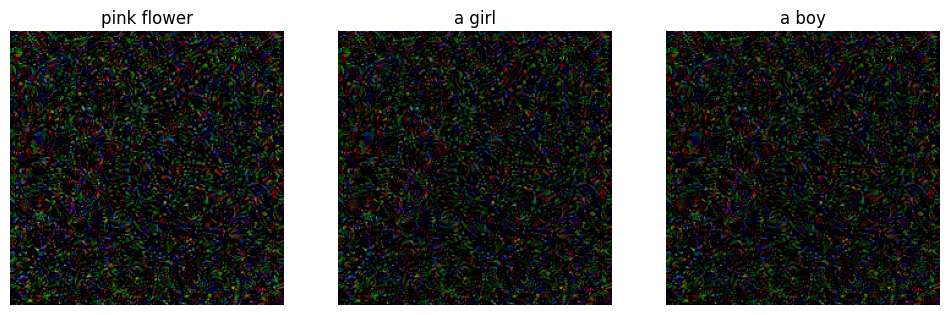

In [ ]:
import matplotlib.pyplot as plt

# text input
text_descriptions = ["pink flower", "a girl", "a boy"]

# encode the text
text_embeddings = [encode_text(desc, tokenizer). unsqueeze(0).to(device) for desc in text_descriptions]

# generate images for each text input
generated_images = []
for text_embedding in text_embeddings:
  # Generate unique noise for each caption
    noise = torch.randn(text_embedding.shape[0], latent_dim).to(device)
    # Generate images
    images = generator(text_embedding, noise).detach().cpu()
    generated_images.append(images)

# Reshape and convert the generated images
generated_images = [images.view(text_embedding.shape[0], 3, 224, 224).permute(0, 2, 3, 1) for images in generated_images]

# Visualize the generated images
fig, axes = plt.subplots(1, len(text_descriptions), figsize=(12, 4))
for i, images in enumerate(generated_images):
    # Clip the image data to the valid range
    clipped_images = np.clip(images[0], 0, 1)
    axes[i].imshow(clipped_images)
    axes[i].axis("off")
    axes[i].set_title(text_descriptions[i])
plt.show()

torch.Size([1, 224, 224, 3])


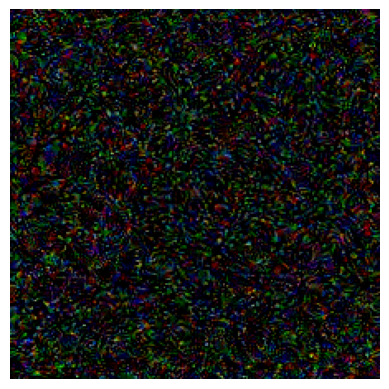

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare the text input
text_description = "pink flower"

# Encode the text
text_embedding = encode_text(text_description, tokenizer).unsqueeze(0).to(device)

# Generate images
noise = torch.randn(text_embedding.shape[0], latent_dim).to(device)
# Generate images
generated_images = generator(text_embedding, noise).detach().cpu()

# Reshape and convert the generated images
generated_images = generated_images.view(text_embedding.shape[0], 3, 224, 224).permute(0, 2, 3, 1)

# Print the shape of generated_images
print(generated_images.shape)

# Visualize the generated image
plt.imshow(generated_images[0])
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 114ms/step


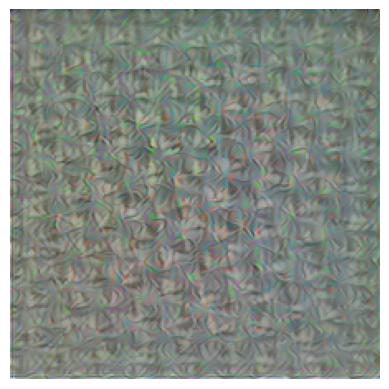

In [ ]:
# Prepare the input text
input_text = "A boy goes down an inflatable slide"

# Encode the text
text_feature = encode_text(input_text, text_encoder)

# Generate the image
random_image_feature = np.random.randn(25088)  # Randomly initialized image feature
generated_image = model.predict([np.expand_dims(random_image_feature, axis=0), np.expand_dims(text_feature, axis=0)])

# Visualize the generated image

plt.imshow(generated_image[0])
plt.axis('off')
plt.show()